# 1、项目背景

建立信用评分卡

RevolvingUtilizationOfUnsecuredLines（可用额度比值）及DebtRatio（负债率）
NumberOfTime30-59DaysPastDueNotWorse（逾期30-59天笔数）、NumberOfTimes90DaysLate（逾期90天笔数）、NumberOfTime60-89DaysPastDueNotWorse（逾期60-89天笔数）

# 2、数据读取

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from subprocess import check_output
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示

In [3]:
data = pd.read_csv("cs-training.csv",engine = "python")
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# 3、数据预处理

In [4]:
#缺失值处理
data.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
# 为缺失值MonthlyIncome记录填充值，设置为平均值
MonthlyIncome_mean_value = data['MonthlyIncome'].mean()
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(MonthlyIncome_mean_value)
# 为缺失值NumberOfDependents记录填充值，设置为平均值
MonthlyIncome_mean_value = data['NumberOfDependents'].mean()
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(MonthlyIncome_mean_value)

Text(0.5, 1.0, 'age')

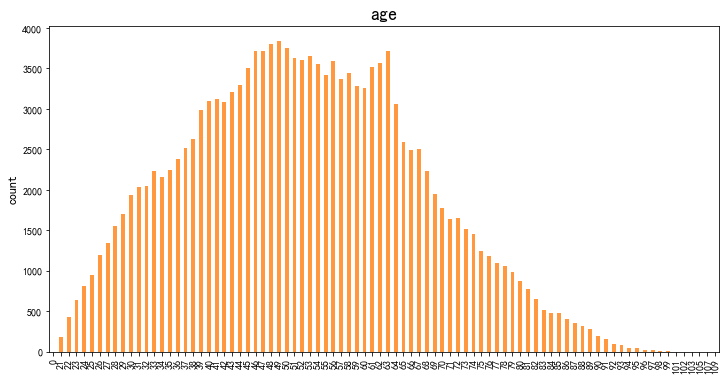

In [6]:
#异常值处理
age = data['age'].value_counts()
age.sort_index().plot.bar(figsize=(12,6), alpha=0.8, color=color[1])
plt.ylabel('count', fontsize=12)
plt.title('age', fontsize=18)

In [7]:
data = data[data['age']>18]
data = data[data['age']<65]

In [8]:
data = data[data['RevolvingUtilizationOfUnsecuredLines']>=0]
data = data[data['RevolvingUtilizationOfUnsecuredLines']<=1]
data = data[data['DebtRatio']>=0]
data = data[data['DebtRatio']<=1]

[Text(1, 0, 'NumberOfTime30-59DaysPastDueNotWorse')]

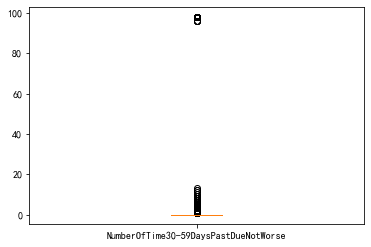

In [9]:
fig = plt.figure()
x1 = data['NumberOfTime30-59DaysPastDueNotWorse']
# 绘制箱线图
ax = fig.add_subplot(111)   #1*1网格，第一子图
ax.boxplot([x1])
ax.set_xticklabels(['NumberOfTime30-59DaysPastDueNotWorse'])

[Text(1, 0, 'NumberOfTimes90DaysLate')]

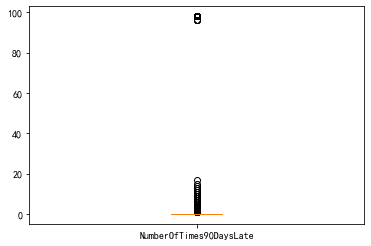

In [10]:
fig = plt.figure()
x2 = data['NumberOfTimes90DaysLate']
ax = fig.add_subplot(111)
ax.boxplot([x2])
ax.set_xticklabels(['NumberOfTimes90DaysLate'])

[Text(1, 0, 'NumberOfTime60-89DaysPastDueNotWorse')]

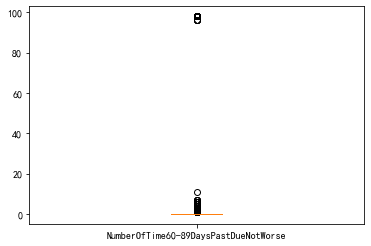

In [11]:
fig = plt.figure()
x3 = data['NumberOfTime60-89DaysPastDueNotWorse']
ax = fig.add_subplot(111)
ax.boxplot([x3])
ax.set_xticklabels(['NumberOfTime60-89DaysPastDueNotWorse'])

In [12]:
#剔除三个变量大于20的值
data = data[data['NumberOfTime30-59DaysPastDueNotWorse'] <= 20]
data = data[data['NumberOfTimes90DaysLate'] <= 20]
data = data[data['NumberOfTime60-89DaysPastDueNotWorse'] <= 20]

月收入

[Text(1, 0, 'MonthlyIncome')]

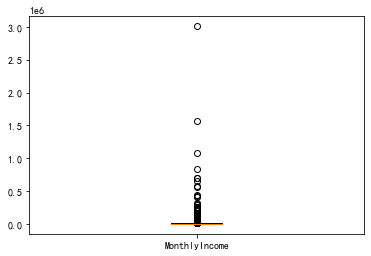

In [13]:
fig = plt.figure()
x = data['MonthlyIncome']
ax = fig.add_subplot(111)
ax.boxplot([x])
ax.set_xticklabels(['MonthlyIncome'])

In [14]:
data = data[data['MonthlyIncome'] <= 1000000]

# 4、探索性分析

好坏客户整体情况

In [15]:
# 考虑到实际分类中，一般正常客户为1，违约客户为0，所以我们需要先转换客户分类列数据。
import matplotlib.pyplot as plt
data['SeriousDlqin2yrs'] = 1-data['SeriousDlqin2yrs']  #转换0、1
grouped = data['SeriousDlqin2yrs'].groupby(data['SeriousDlqin2yrs']).count()
#print("不良客户占比:",(grouped[0]/grouped[1])*100,"%")
#grouped.plot(kind = 'pie')

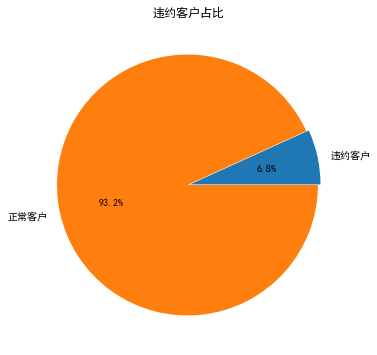

In [16]:
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']='SimHei'#设置中文显示
plt.figure(figsize=(6,6))#将画布设定为正方形，则绘制的饼图是正圆
label=['违约客户','正常客户']#定义饼图的标签，标签是列表
explode=[0.01,0.01]#设定各项距离圆心n个半径
#plt.pie(values[-1,3:6],explode=explode,labels=label,autopct='%1.1f%%')#绘制饼图
values=[grouped[0], grouped[1]]
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')#绘制饼图
plt.title('违约客户占比')
plt.savefig('./违约客户占比')
plt.show()

相关性分析

<AxesSubplot:>

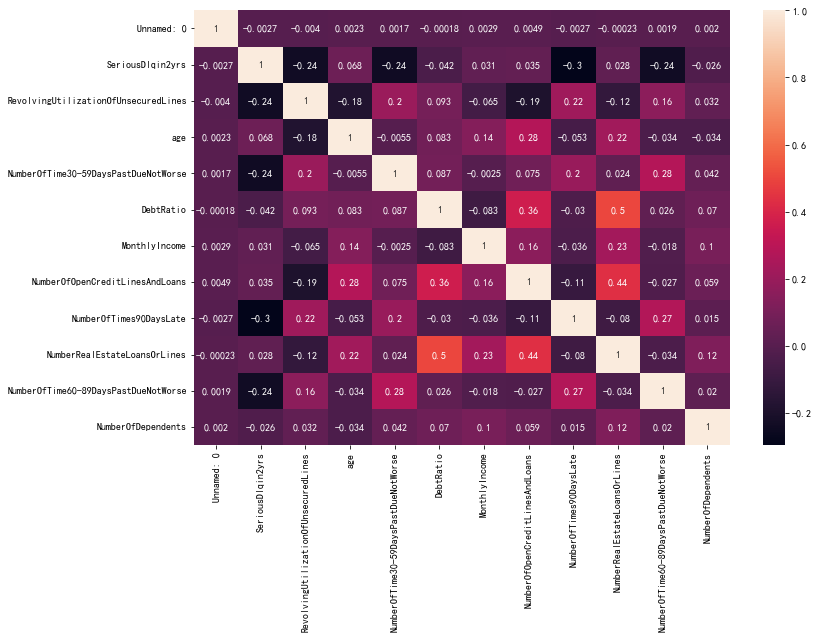

In [17]:
corr = data.corr()
corr
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(corr,annot = True,ax = ax1) #annot:annotate的缩写，annot默认为False，当annot为True时，在heatmap中每个方格写入数据

数据集划分

In [18]:
from sklearn.model_selection import train_test_split
Y = data['SeriousDlqin2yrs']
X=data.iloc[:,1:]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8,random_state=100)
train = pd.concat([Y_train,X_train], axis =1)  #concat函数是在pandas底下的方法，可以将数据根据不同的轴作简单的融合
test = pd.concat([Y_test,X_test], axis =1)
train = train.reset_index(drop=True)   #经过reset_index(drop=True)，可使index连续，如果不进行reset_index(drop=True)，index会变得不连续
test = test.reset_index(drop=True)
#保留一份测试数据集，后面生成评分卡
#test.to_csv('origin_test.csv', index=False)

数据分箱

In [19]:
import scipy.stats as stats

def monoto_bin(Y, X, n):
    #相关系数初始化
    r = 0
    total_good = Y.sum()
    total_bad =Y.count()-total_good
    #选择最佳分箱数量：从n自减，寻找到最大绝对值相关系数。这是一种经验做法。也可以使用其他分箱方法
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n)})
        #次数n代表分箱的个数，每个分箱内数据个数相等
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    #循环完成后，此时同时得到了某个d2和n，d2就是最佳分箱下的参数
    
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    #好坏比，求woe,证据权重，自变量对目标变量有没有影响，什么影响
    d3['goodattr']=d3[Y.name]/total_good
    #goodattr计算方式是每个箱子里的好客户数量/数据集里总的好客户数量
    d3['badattr']=(d3['total']-d3[Y.name])/total_bad
    #badattr计算方式是每个箱子里的坏客户数量/数据集里总的坏客户数量
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    #之所以这样设置公式，是根据逻辑回归来定义的
    #iv，信息值，自变量对于目标变量的影响程度
    #IV为information value表示特征的预测能力，如果分箱后，好坏样本所占的比例相差不大的话，就失去了预测能力
    #该公式相当于求內积之和
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    print (d4)
    cut = []    #存放箱段节点
    cut.append(float('-inf'))   #在列表前加-inf
    for i in range(1,n+1):      # n 是前面分箱的分割数  ，所以分成n+1份
        qua =X.quantile(i/(n+1))  # quantile 分为数 得到分箱的节点
        cut.append(round(qua,4))   # quantile 分为数 得到分箱的节点
    cut.append(float('inf'))    # 在列表后加inf
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe
    #cut是对X取他的四分位，因为Y只有0/1也不能取四分位。n=3因为最后有n-1，所以实际上是分成了四个桶，woe是四个值。goodattribute是好的属性的

自动分箱

In [20]:
dfx1,ivx1,cutx1,woex1 = monoto_bin(data['SeriousDlqin2yrs'],data['RevolvingUtilizationOfUnsecuredLines'],n = 10)
dfx2,ivx2,cutx2,woex2 = monoto_bin(data['SeriousDlqin2yrs'],data['age'],n = 10)
dfx4,ivx4,cutx4,woex4 = monoto_bin(data['SeriousDlqin2yrs'],data['DebtRatio'],n = 10)
dfx5,ivx5,cutx5,woex5 = monoto_bin(data['SeriousDlqin2yrs'],data['MonthlyIncome'],n = 10)
dfx6,ivx6,cutx6,woex6 = monoto_bin(data['SeriousDlqin2yrs'],data['NumberOfOpenCreditLinesAndLoans'],n = 10)

   min_RevolvingUtilizationOfUnsecuredLines  \
0                                  0.000000   
1                                  0.043661   
2                                  0.207988   
3                                  0.602190   

   max_RevolvingUtilizationOfUnsecuredLines  SeriousDlqin2yrs  total  \
0                                  0.043660             22078  22576   
1                                  0.207983             21973  22576   
2                                  0.602073             21250  22575   
3                                  1.000000             18869  22576   

   goodattr   badattr       woe  
0  0.262302  0.081200  1.172582  
1  0.261055  0.098321  0.976498  
2  0.252465  0.216044  0.155790  
3  0.224177  0.604435 -0.991857  
   min_age  max_age  SeriousDlqin2yrs  total  goodattr   badattr       woe
0       21       32             10444  11539  0.124082  0.178542 -0.363881
1       33       38             10174  11078  0.120874  0.147399 -0.198393
2       

不能用最优分段的变量，采用自定义分箱

In [21]:
import scipy.stats as stats
def self_bin(x,y,cut): # x为待分箱的变量，y为target变量,cut为自定义的分箱(list)
    total = y.count()  # 计算总样本数
    bad = y.sum()      # 计算坏样本数
    good = y.count()-y.sum()  # 计算好样本数
    d1 = pd.DataFrame({'x':x,'y':y,'bucket':pd.cut(x,cut)}) 
    d2 = d1.groupby('bucket',as_index=True)  # 按照分箱结果进行分组聚合
    d3 = pd.DataFrame(d2.x.min(),columns=['min_bin']) 
    d3['min_bin'] = d2.x.min()  # 箱体的左边界
    d3['max_bin'] = d2.x.max()  # 箱体的右边界
    d3['bad'] = d2.y.sum()  # 每个箱体中坏样本的数量
    d3['total'] = d2.y.count() # 每个箱体的总样本数
    d3['bad_rate'] = d3['bad']/d3['total']  # 每个箱体中坏样本所占总样本数的比例
    d3['badattr'] = d3['bad']/bad   # 每个箱体中坏样本所占坏样本总数的比例
    d3['goodattr'] = (d3['total'] - d3['bad'])/good  # 每个箱体中好样本所占好样本总数的比例
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])  # 计算每个箱体的woe值
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()  # 计算变量的iv值
    d4 = (d3.sort_values(by = 'min_bin')).reset_index(drop=True) # 对箱体从大到小进行排序
    print('分箱结果：')
    print(d4)
    print('IV值为：')
    print(iv)
    woe = list(d4['woe'].round(3))
    return d4,iv,woe

In [22]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx3 = [ninf, pinf]
cutx7 = [ninf, 0, pinf]
cutx8 = [ 0, pinf]
cutx9 = [ninf, 0, pinf]
cutx10 = [0,pinf]
dfx3, ivx3,woex3 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfTime30-59DaysPastDueNotWorse'],cutx3)
dfx7, ivx7,woex7 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfTimes90DaysLate'],cutx7)
dfx8, ivx8,woex8 = self_bin(data['SeriousDlqin2yrs'],data['NumberRealEstateLoansOrLines'],cutx8) 
dfx9, ivx9,woex9 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfTime60-89DaysPastDueNotWorse'],cutx9)
dfx10, ivx10,woex10 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfDependents'],cutx10)

分箱结果：
   min_bin  max_bin    bad  total  bad_rate  badattr  goodattr  woe
0        0        1  23442  90303  0.259593      1.0       1.0  0.0
IV值为：
0.0
分箱结果：
   min_bin  max_bin   bad  total  bad_rate   badattr  goodattr       woe
0        0        0  3713   6133  0.605413  0.456928  0.029449 -2.741879
1        1        1  4413  84170  0.052430  0.543072  0.970551  0.580623
IV值为：
1.420302498764587
分箱结果：
   min_bin  max_bin    bad  total  bad_rate   badattr  goodattr       woe
0        1        1  89600  84170  1.064512  0.939302  1.067427  0.127869
IV值为：
0.016383248922518613
分箱结果：
   min_bin  max_bin   bad  total  bad_rate  badattr  goodattr       woe
0        0        0  2133   6133  0.347791  0.36257  0.047382 -2.034973
1        1        1  3750  84170  0.044553  0.63743  0.952618  0.401770
IV值为：
0.7680318337016258
分箱结果：
   min_bin  max_bin           bad  total  bad_rate   badattr  goodattr  \
0        1        1  82026.513897  84170  0.974534  0.924026  1.398973   

        woe  
0 

计算IV值

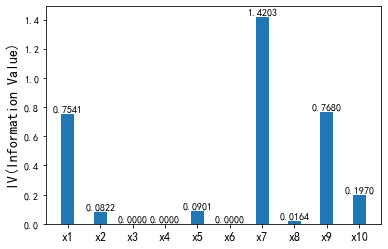

In [23]:
ivlist=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]#各变量IV
index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']#x轴的标签
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1, 1, 1)  
#在一个大的画图空间fig中，前两个参数1和1分别代表子图的行数和列数，也就是我们现在生成了1x1图像，最后一个参数1代表第1个子图
x = np.arange(len(index))+1 #设置x轴柱子的个数
ax1.bar(x, ivlist, width=0.4)#生成柱状图
ax1.set_xticks(x)  #设置x轴的刻度
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=14)

#在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha = 'center', va = 'bottom', fontsize = 10)
    # ha='center'点在注释右边（right,center,left）,va='bottom'点在注释底部('top', 'bottom', 'center', 'baseline')
plt.show()

# 5、模型分析

WOE转换

In [24]:
#建立模型之前，我们需要将筛选后的变量转换为WOE值，便于信用评分
#替换成WOE函数
def replace_woe(series,cut,woe):
    list=[]
    i=0
    while i<len(series):
        try:
            value=series[i]
        except:
            i += 1
            continue
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

# 替换成WOE
train['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
train['age'] = pd.Series(replace_woe(train['age'], cutx2, woex2))
train['NumberOfTime30-59DaysPastDueNotWorse'] = pd.Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
train['DebtRatio'] = pd.Series(replace_woe(train['DebtRatio'], cutx4, woex4))
train['MonthlyIncome'] = pd.Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
train['NumberOfOpenCreditLinesAndLoans'] = pd.Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
train['NumberOfTimes90DaysLate'] = pd.Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
train['NumberRealEstateLoansOrLines'] = pd.Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
train['NumberOfTime60-89DaysPastDueNotWorse'] = pd.Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
train['NumberOfDependents'] = pd.Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
train.dropna(how = 'any')
train.to_csv('WoeData.csv', index=False)

# 替换成WOE
test['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
test['age'] = pd.Series(replace_woe(test['age'], cutx2, woex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = pd.Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
test['DebtRatio'] = pd.Series(replace_woe(test['DebtRatio'], cutx4, woex4))
test['MonthlyIncome'] = pd.Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
test['NumberOfOpenCreditLinesAndLoans'] = pd.Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
test['NumberOfTimes90DaysLate'] = pd.Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
test['NumberRealEstateLoansOrLines'] = pd.Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = pd.Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
test['NumberOfDependents'] = pd.Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
test.dropna(how = 'any')

,SeriousDlqin2yrs,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,-0.992,-0.364,0.0,0.0,-0.208,0.0,0.581,0.128,0.402,0.415
1,1,1,1.173,0.092,0.0,0.0,0.286,0.0,0.581,0.128,0.402,0.415
2,1,1,-0.992,0.381,0.0,0.0,0.499,0.0,0.581,0.128,0.402,0.415
3,1,1,0.976,-0.198,0.0,0.0,0.095,0.0,0.581,0.128,0.402,0.415
4,1,1,1.173,-0.364,0.0,0.0,-0.372,0.0,0.581,0.128,0.402,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...
18056,1,1,0.156,-0.161,0.0,0.0,0.095,0.0,0.581,0.128,0.402,0.415
18057,1,1,1.173,-0.031,0.0,0.0,0.499,0.0,0.581,0.128,0.402,0.415
18058,1,1,0.156,-0.013,0.0,0.0,-0.372,0.0,0.581,0.128,0.402,0.415
18059,1,1,-0.992,0.651,0.0,0.0,0.286,0.0,0.581,0.128,0.402,0.415


根据IV值筛选变量

In [25]:
train_X =X_train.drop(['NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines'],axis=1)
test_X =X_test.drop(['NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines'],axis=1)

建立逻辑回归模型

In [29]:
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm  # 最小二乘
X_train = train_X.drop(['SeriousDlqin2yrs'],axis=1)
y_train = Y_train
X_test= test_X.drop(['SeriousDlqin2yrs'],axis=1)
y_test= Y_test
X_train = sm.add_constant(X_train)   # sm.add_constant 函数可以添加一个截距的列到现存的矩阵
logit = sm.Logit(y_train,X_train)
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.205080
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.174     
Dependent Variable:         SeriousDlqin2yrs       AIC:                    29642.7278
Date:                       2022-06-09 19:11       BIC:                    29697.8545
No. Observations:           72242                  Log-Likelihood:         -14815.   
Df Model:                   5                      LL-Null:                -17931.   
Df Residuals:               72236                  LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

模型检验

E:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


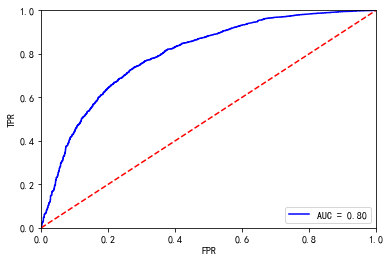

In [30]:
from sklearn.metrics import roc_curve, auc
X2 = sm.add_constant(X_test)
resu = result.predict(X2)
FPR,TPR,threshold = roc_curve(y_test,resu)
ROC_AUC = auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.2f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])   #限制x轴的取值范围
plt.ylim([0, 1])   #限制y轴的取值范围
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

# 6、建立信用评分卡

In [31]:
# 取600分为基础分值，PDO为20（每高20分好坏比翻一倍），好坏比取20。
import math
p = 20 / math.log(2)  # 比例因子
q = 600 - 20 * math.log(20) / math.log(2)  #等于offset,偏移量
coe=[3.3727, -1.9394,  0.0109, -0.7302, -0.8708, -0.0576]  # 回归系数
baseScore = round(q + p * coe[0], 0)
#个人总评分=基础分+各部分得分
# 因为第一个是常数项
#构建评分卡时候只需要选出那些，IV值高的特征就行，最后相加得到总分

#计算分数函数
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

# 各项部分分数
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x7 = get_score(coe[3], woex7, p)
x9 = get_score(coe[4], woex9, p)
x10 = get_score(coe[5], woex10, p)

In [32]:
x1

[-66.0, -55.0, -9.0, 56.0]

In [33]:
x2

[-0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0]

In [34]:
x7

[58.0, -12.0]

In [35]:
x9

[51.0, -10.0]

In [36]:
x10

[-1.0]

根据变量计算分数

In [37]:
def compute_score(series,cut,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list
# j和m相当于j是移动光标，m是跟着j，确定数的
# list就是在x1里面挑一个值，这个值和series[i]是对应的

from pandas import Series
test['BaseScore']=Series(np.zeros(len(test))) + baseScore
test['x1'] = Series(compute_score(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
test['x2'] = Series(compute_score(test['age'], cutx2, x2))
test['x7'] = Series(compute_score(test['NumberOfTimes90DaysLate'], cutx7, x7))
test['x9'] = Series(compute_score(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test['x10'] = Series(compute_score(test['NumberOfDependents'], cutx10, x10))
test['Score'] = test['x1'] + test['x2'] + test['x7'] + test['x9'] +test['x10']  + baseScore
test.to_csv('ScoreData.csv', index=False)

In [38]:
test.loc[:,['SeriousDlqin2yrs','BaseScore', 'x1', 'x2', 'x7', 'x9', 'x10', 'Score']]

,SeriousDlqin2yrs,SeriousDlqin2yrs,BaseScore,x1,x2,x7,x9,x10,Score
0,1,1,611.0,-66.0,-0.0,-12.0,-10.0,-1.0,522.0
1,1,1,611.0,56.0,-0.0,-12.0,-10.0,-1.0,644.0
2,1,1,611.0,-66.0,-0.0,-12.0,-10.0,-1.0,522.0
3,1,1,611.0,56.0,-0.0,-12.0,-10.0,-1.0,644.0
4,1,1,611.0,56.0,-0.0,-12.0,-10.0,-1.0,644.0
...,...,...,...,...,...,...,...,...,...
18056,1,1,611.0,-55.0,-0.0,-12.0,-10.0,-1.0,533.0
18057,1,1,611.0,56.0,-0.0,-12.0,-10.0,-1.0,644.0
18058,1,1,611.0,-55.0,-0.0,-12.0,-10.0,-1.0,533.0
18059,1,1,611.0,-66.0,-0.0,-12.0,-10.0,-1.0,522.0


In [39]:
test.loc[:,['SeriousDlqin2yrs','BaseScore', 'x1', 'x2', 'x7', 'x9', 'x10', 'Score']].tail()

,SeriousDlqin2yrs,SeriousDlqin2yrs,BaseScore,x1,x2,x7,x9,x10,Score
18056,1,1,611.0,-55.0,-0.0,-12.0,-10.0,-1.0,533.0
18057,1,1,611.0,56.0,-0.0,-12.0,-10.0,-1.0,644.0
18058,1,1,611.0,-55.0,-0.0,-12.0,-10.0,-1.0,533.0
18059,1,1,611.0,-66.0,-0.0,-12.0,-10.0,-1.0,522.0
18060,1,1,611.0,56.0,-0.0,-12.0,-10.0,-1.0,644.0


In [41]:
test_2=test.loc[:,['SeriousDlqin2yrs','BaseScore', 'x1', 'x2', 'x7', 'x9', 'x10', 'Score']]

In [42]:
test_2.describe()

,SeriousDlqin2yrs,SeriousDlqin2yrs,BaseScore,x1,x2,x7,x9,x10,Score
count,18061.000000,18061.000000,18061.0,18061.000000,18061.0,18061.0,18061.0,18061.0,18061.000000
mean,0.932064,0.932064,611.0,-2.482033,0.0,-12.0,-10.0,-1.0,585.517967
std,0.251644,0.251644,0.0,58.384387,0.0,0.0,0.0,0.0,58.384387
min,0.000000,0.000000,611.0,-66.000000,-0.0,-12.0,-10.0,-1.0,522.000000
25%,1.000000,1.000000,611.0,-66.000000,0.0,-12.0,-10.0,-1.0,522.000000
50%,1.000000,1.000000,611.0,-55.000000,0.0,-12.0,-10.0,-1.0,533.000000
75%,1.000000,1.000000,611.0,56.000000,0.0,-12.0,-10.0,-1.0,644.000000
max,1.000000,1.000000,611.0,56.000000,-0.0,-12.0,-10.0,-1.0,644.000000


每个客户的信用分，最低分为522分，最高分为644分，得分的中位数为533分，可以以533分为一个界限分值，信用分低于533分的客户可以视为他违约的概率比较大，在向他发放贷款的时候要多加考虑，必要时可以考虑不向其贷款，类似的，信用分高于533的客户可以说他的信用度还可以，在其申请贷款的时候可以考虑允许向其发放贷款。